In [1]:
import ROOT
from ROOT import TFile, TH1F, TCanvas, TLegend, TH2D
import sys
sys.path.append('/Users/demattia/Desktop/Notebooks')
import rootprint
import rootnotes
import itertools
from math import atan2, sqrt

In [17]:
# input_file = TFile("/Users/demattia/Material/Nominal/extracted_448.root")
# input_file = TFile("/Users/demattia/Material/ZeroMaterial/extracted_448.root")
input_file = TFile("/Users/demattia/Material/NoDeltaRays/extracted_448.root")

tree = input_file.Get("TkStubs")

In [18]:
longitudinalView = TH2D("longitudinalView", "longitudinalView", 200, 0, 100, 240, 0, 120)
transverseView = TH2D("transverseView", "transverseView", 240, -120, 120, 240, -120, 120)

hLayer = dict()
hLayerRPhi = dict()
z_range = {5:12, 6:18, 7:25, 8:35, 9:45, 10:50}
R_range_min = {5:20, 6:33, 7:47, 8:65, 9:85, 10:105}
R_range_max = {5:25, 6:38, 7:55, 8:72, 9:92, 10:110}

for l in range(5, 11):
    # the range in z is because eta is flat from 0 to 0.4 -> z in 0, ~45 cm at R = 1.1 m.
    hLayer[l] = TH2D("layer"+str(l), "layer"+str(l), 100, -0.5, 0.5, 1000, 0, z_range[l])
    hLayerRPhi[l] = TH2D("layerPhiR"+str(l), "layerPhiR"+str(l), 100, -0.5, 0.5, 1000, R_range_min[l], R_range_max[l])

i=0
for event in tree:
    if len(event.L1TkSTUB_x) != len(event.L1TkSTUB_y) or len(event.L1TkSTUB_y) != len(event.L1TkSTUB_z):
        print "ERROR: INCONSISTENT NUMBER OF STUB COORDINATES"
        break

    for pdgId, layer, x, y, z in itertools.izip(event.L1TkSTUB_pdgID, event.L1TkSTUB_layer,
                                                event.L1TkSTUB_x, event.L1TkSTUB_y, event.L1TkSTUB_z):
        if pdgId != -13:
            continue
        radius = sqrt(x**2+y**2)
        longitudinalView.Fill(z, radius)
        transverseView.Fill(x, y)
        # print x, y, z
        hLayer[layer].Fill(atan2(y, x), z)
        hLayerRPhi[layer].Fill(atan2(y, x), radius)
        # print "atan2 =", ROOT.Math.atan2(y, x), ", z =", z
    # i+=1
    # if i>=3: break


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: cView


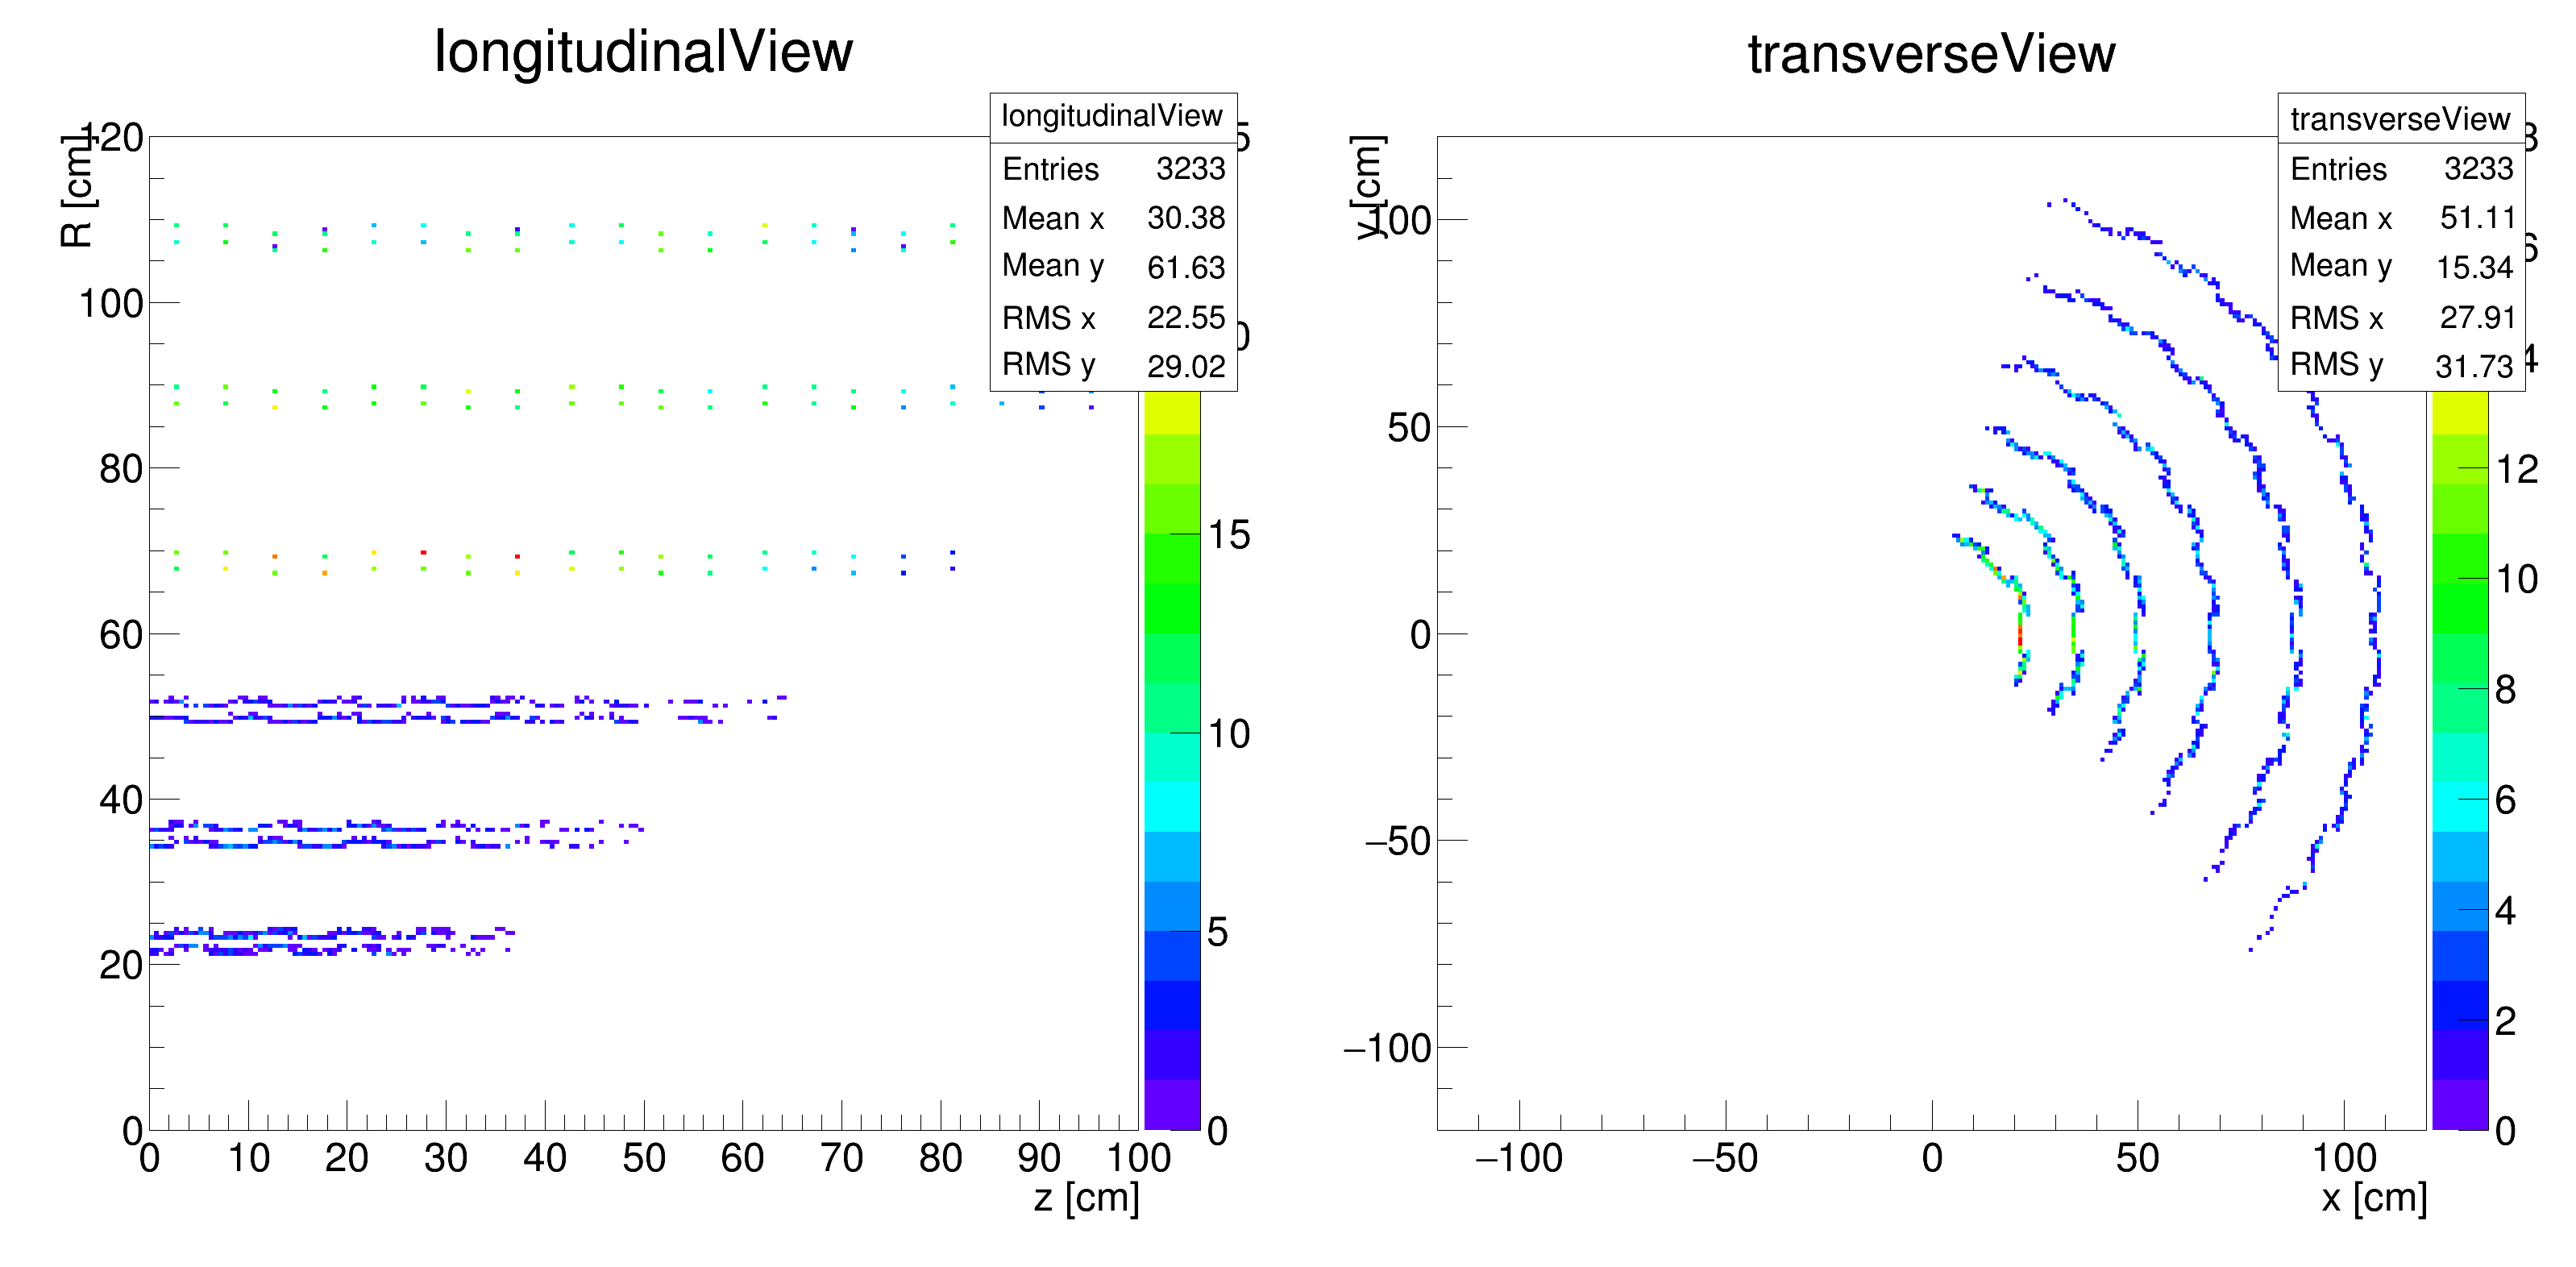

In [19]:
cView = TCanvas("cView", "cView", 3200, 1600)
cView.Divide(2, 1)
cView.cd(1)
longitudinalView.Draw("COLZ")
longitudinalView.GetXaxis().SetTitle("z [cm]")
longitudinalView.GetYaxis().SetTitle("R [cm]")
cView.cd(2)
transverseView.Draw("COLZ")
transverseView.GetXaxis().SetTitle("x [cm]")
transverseView.GetYaxis().SetTitle("y [cm]")
cView

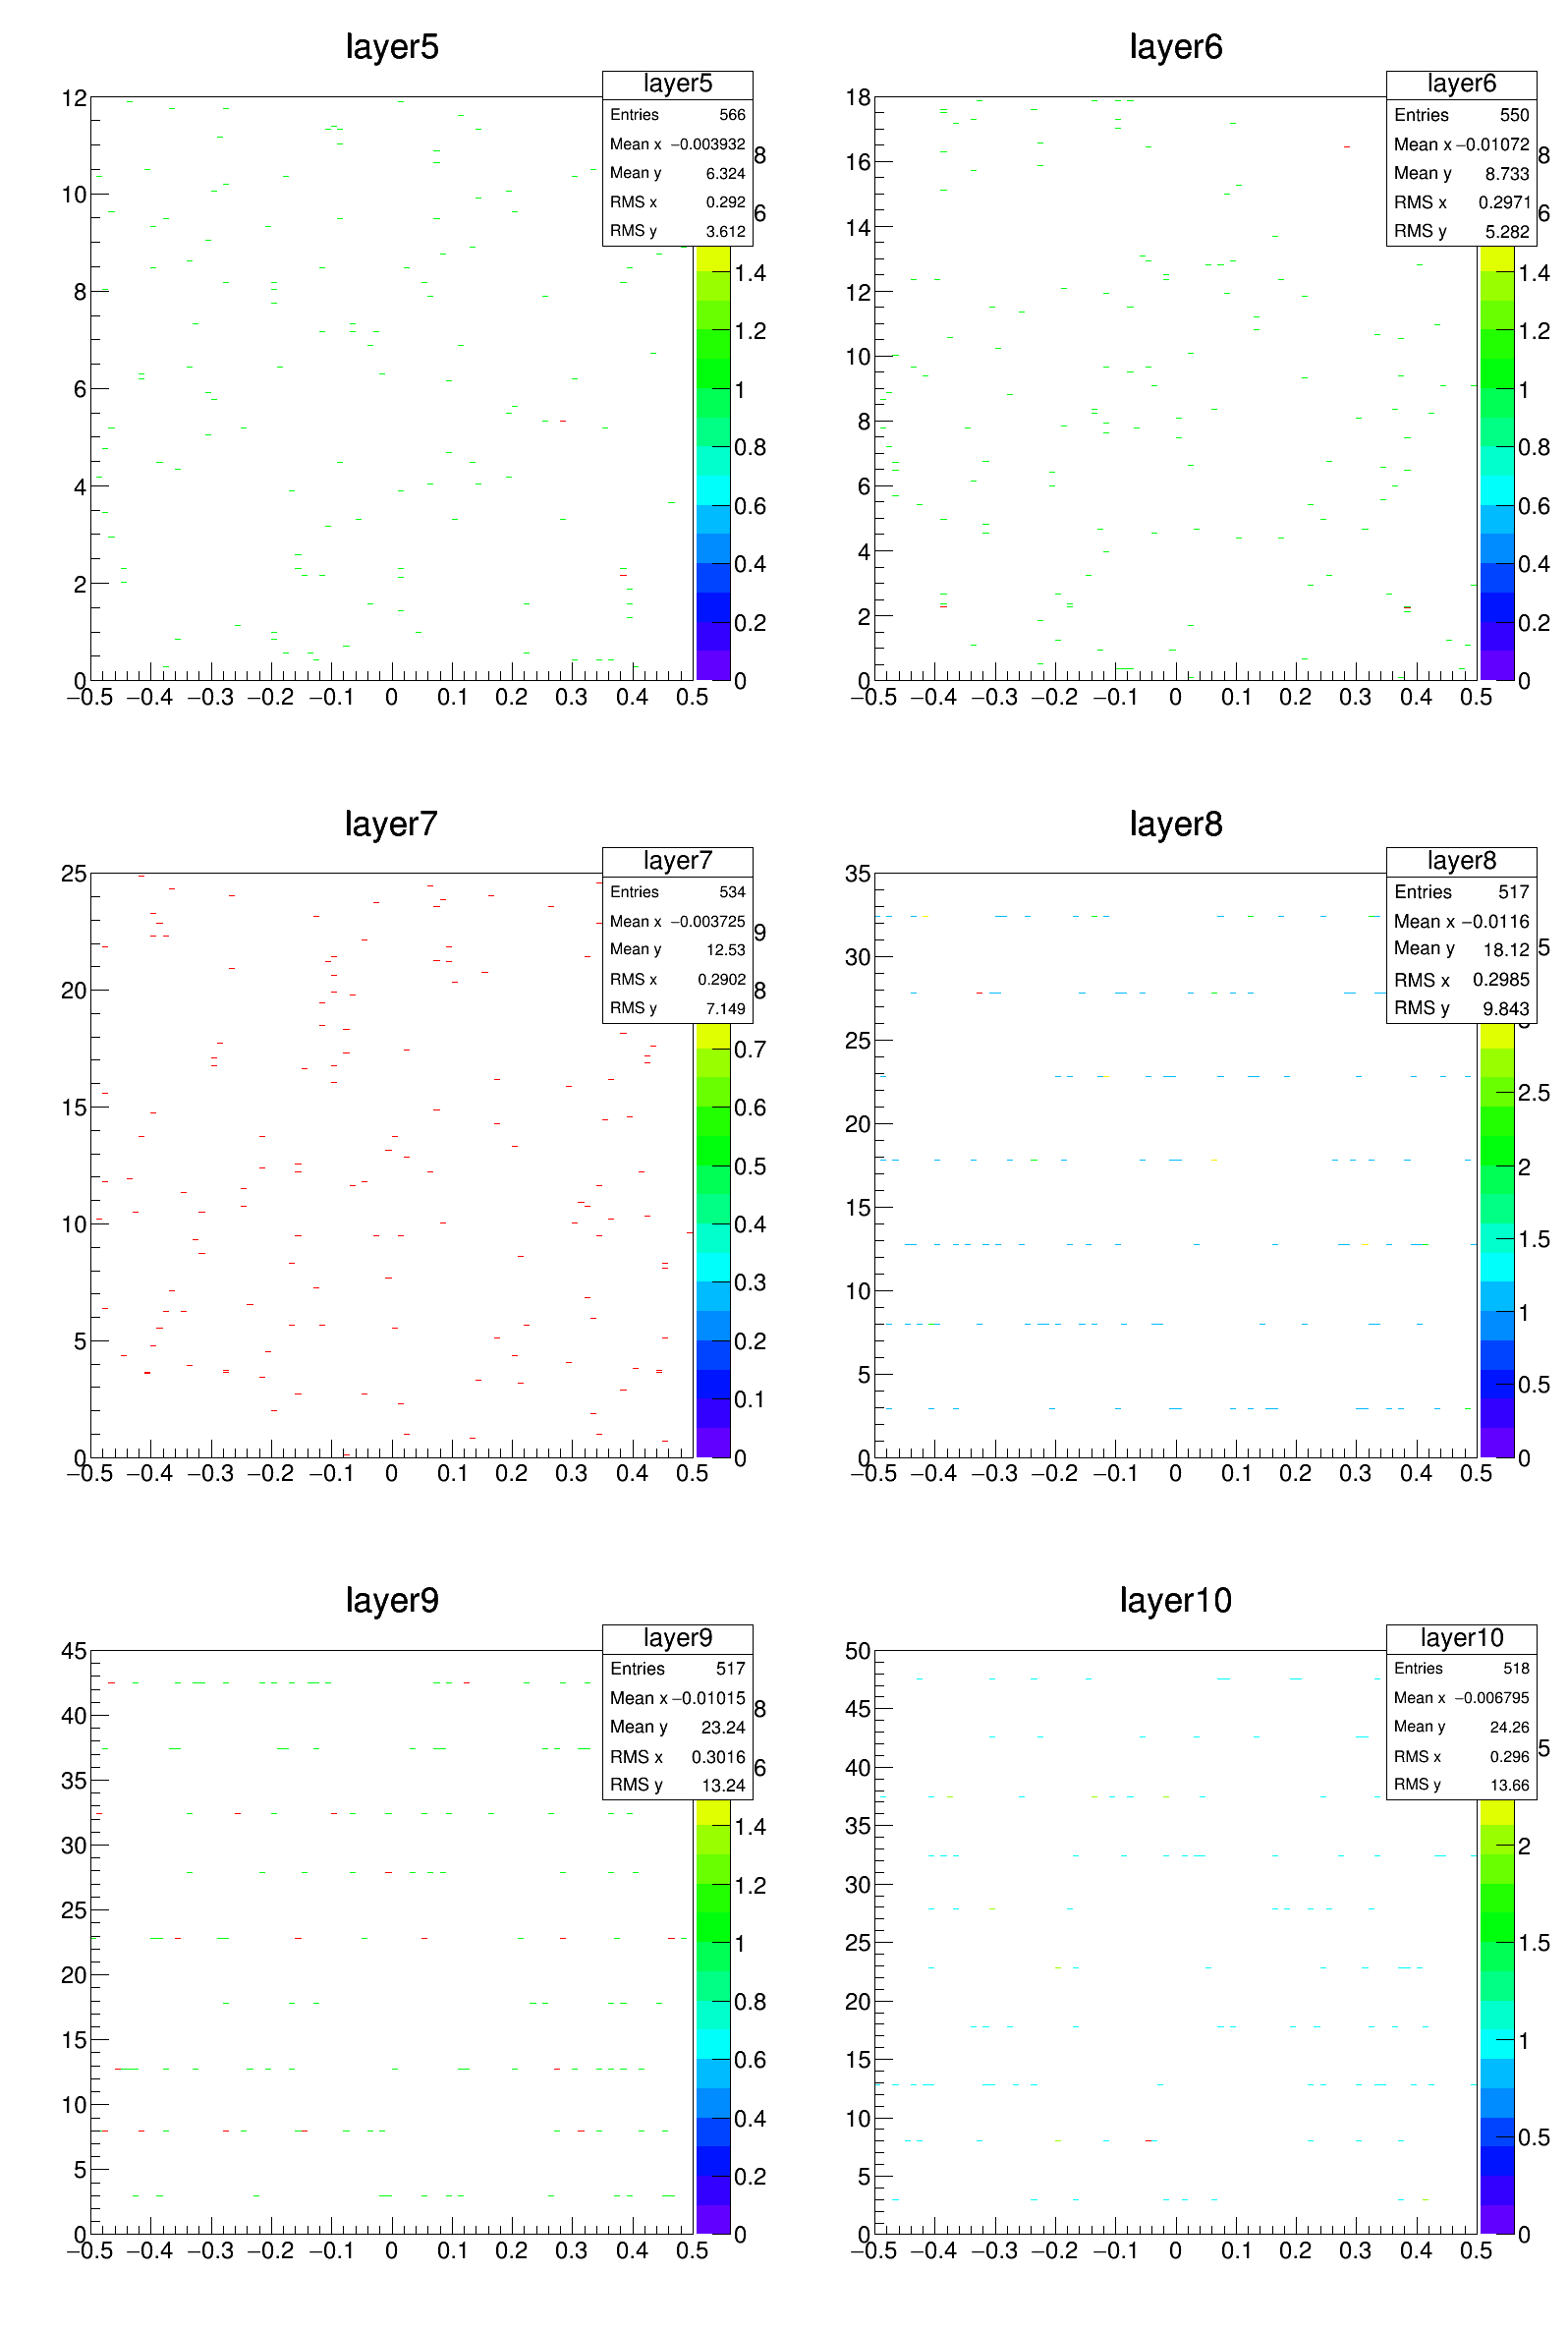

In [6]:
c = TCanvas("c", "c", 1600, 2400)
c.Divide(2,3)
c.cd(1)
hLayer[5].Draw("COLZ")
c.cd(2)
hLayer[6].Draw("COLZ")
c.cd(3)
hLayer[7].Draw("COLZ")
c.cd(4)
hLayer[8].Draw("COLZ")
c.cd(5)
hLayer[9].Draw("COLZ")
c.cd(6)
hLayer[10].Draw("COLZ")
c.SaveAs("c.root")
c

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


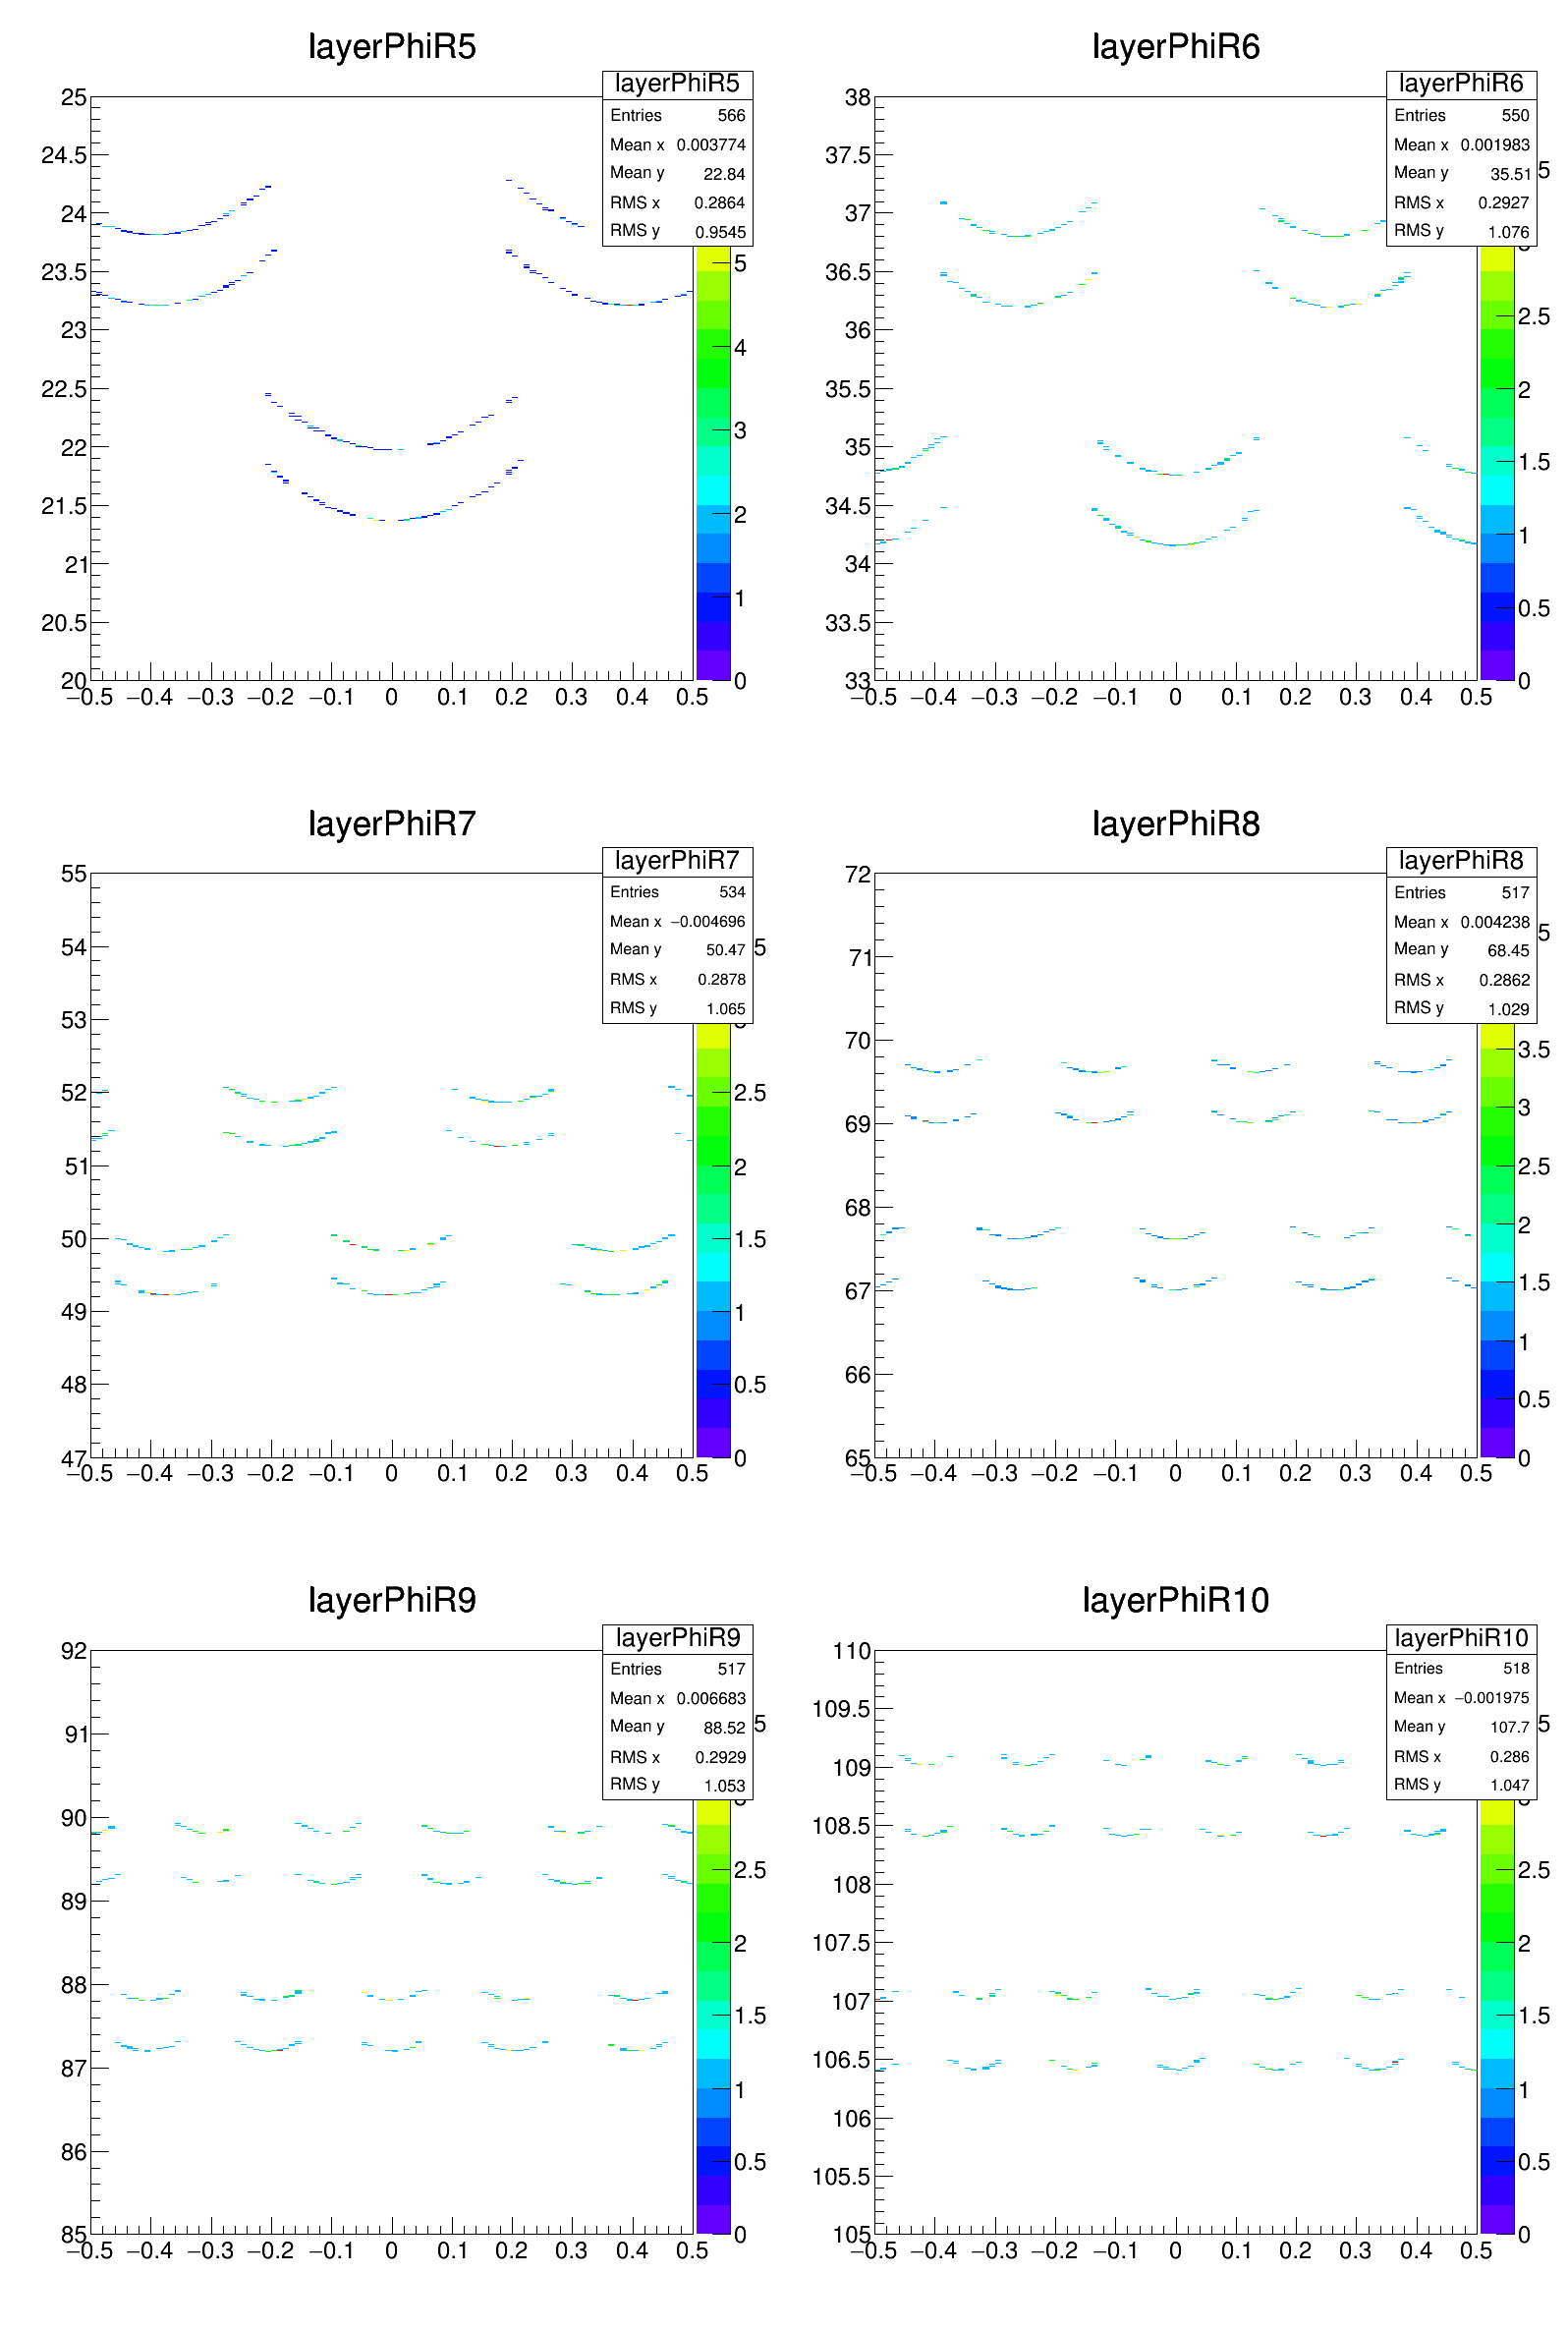

In [7]:
cRPhi = TCanvas("c", "c", 1600, 2400)
cRPhi.Divide(2,3)
cRPhi.cd(1)
hLayerRPhi[5].Draw("COLZ")
cRPhi.cd(2)
hLayerRPhi[6].Draw("COLZ")
cRPhi.cd(3)
hLayerRPhi[7].Draw("COLZ")
cRPhi.cd(4)
hLayerRPhi[8].Draw("COLZ")
cRPhi.cd(5)
hLayerRPhi[9].Draw("COLZ")
cRPhi.cd(6)
hLayerRPhi[10].Draw("COLZ")
cRPhi.SaveAs("c.root")
cRPhi

In [8]:
inputFileName = TFile("/Users/demattia/RemoteProjects/extracted_PtRange_10_30.root")
tree = input_file.Get("TkStubs")

hX0 = TH1F("hX0", "hX0", 100, -0.0001, 0.0001)
hY0 = TH1F("hY0", "hY0", 100, -0.01, 0.01)

i=0
for event in tree:
    if i > 1000:
        break
    if len(event.L1TkSTUB_X0) != len(event.L1TkSTUB_Y0) or len(event.L1TkSTUB_X0) != len(event.L1TkSTUB_Y0):
        print "ERROR: INCONSISTENT NUMBER OF STUB COORDINATES"
        break

    for pdgId, layer, x0, y0, z0 in itertools.izip(event.L1TkSTUB_pdgID, event.L1TkSTUB_layer, event.L1TkSTUB_X0, event.L1TkSTUB_Y0, event.L1TkSTUB_Z0):
        if pdgId != -13:
            continue
        hX0.Fill(x0)
        hY0.Fill(y0)
    i += 1

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


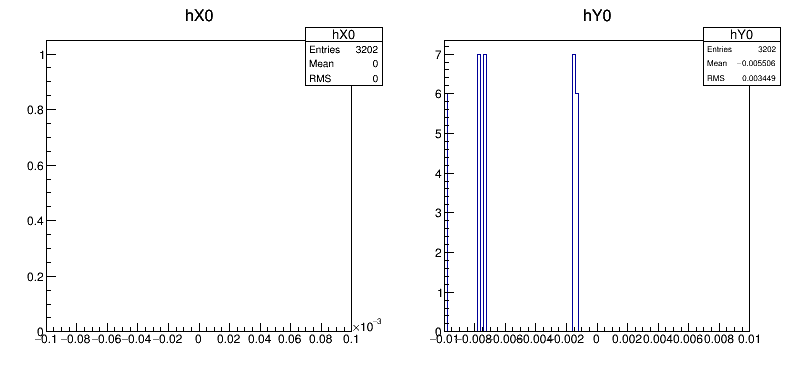

In [10]:
c = TCanvas("c", "c", 800, 400)
c.Divide(2,1)
c.cd(1)
hX0.Draw()
c.cd(2)
hY0.Draw()
c